In [3]:
import numpy as np
from scipy.stats import gamma
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from SEIR_viral_load import *
import pandas as pd

In [4]:
def sample_viral_control_points():
    t3 = np.random.random() + 2.5
    temp_p = gamma.rvs(1.5, loc=.5)
    if (temp_p > 3):
        while (temp_p > 3):
            temp_p = gamma.rvs(1.5, loc=.5)    
    tp = t3 + temp_p         
    yp = np.random.uniform(7,11)
    t6 = t3 + tp + np.random.uniform(4,9)
    
      
    x = [t3, tp, t6]
    y = [3, yp, 6, 3]
    final_x = calculate_final_x(x, y)
    x.append(final_x)
    return x, y

In [ ]:
def calculate_LOD5_x(x, y):
    

In [5]:
def calculate_final_x(x, y):
    xf = x[2] - 3*((x[1]-x[2])/(y[1]-y[2]))
    return xf

In [6]:
def create_viral_trajectory():
    x, y = sample_viral_control_points()
    df = pd.DataFrame({'x' : x, 'y' : y})
    return df

In [23]:
def generate_trajectory_plot():
    n = 1000
    df = create_viral_trajectory()
    
    for i in range(n):
        df += create_viral_trajectory()
    df = df/(n+1)    
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(df.x, df.y, color='k')
    
    #Bit of hackey code to insert threshold points
    ax.scatter(3.53, 5, color='k')
    ax.annotate("({},{})".format(3.53, 5.0), xy=(3.53, 5.0), xytext=(3.53+.3, 5 + .2), fontsize=12)
    ax.scatter(3.8, 6, color='k')
    ax.annotate("({},{})".format(3.8, 6.0), xy=(3.8, 6.0), xytext=(3.8+.3, 6 + .2), fontsize=12)   
    
    round_x = np.round(df.x, 1)
    round_y = np.round(df.y, 1)
    for i,j in zip(round_x,round_y):
    # xytext and textcoords are used to offset the labels
        ax.annotate("({},{})".format(i, j), xy=(i, j), xytext=(i+.3, j + .2), fontsize=12)    
    
    ax.plot(df.x, df.y, 'k', linewidth=3)        
    
    for i in range(25):
        df = create_viral_trajectory()
        ax.plot(df.x, df.y, 'k', alpha=.2)
        
    ax.set_xlabel("Days since Infection", fontsize=16)
    ax.set_ylabel("log10 viral load", fontsize=16)
    ax.set_title("Some sample viral trajectories with bold mean", fontsize=18)
    ax.set_xlim([0,35])
    ax.set_ylim([2,11])
    ax.axhline(y=3, xmin=.02, xmax=.98, color='#0F27F3', label="LOD 10^3")
    ax.axhline(y=5, xmin=.02, xmax=.98, color='#960FF3', label="LOD 10^5")
    ax.axhline(y=6, xmin=.02, xmax=.98, color='#E71D0D', label="Infectious Threshold")
    ax.legend()
    fig.savefig('ViralTrajectory.png', bbox_inches='tight')
        
    

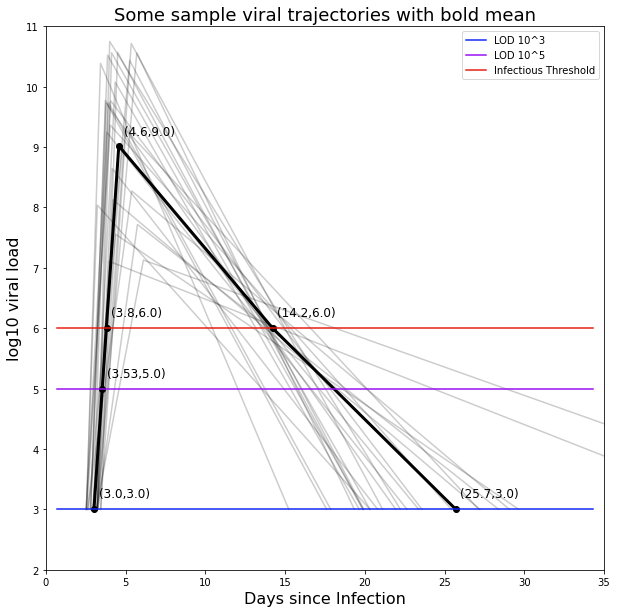

In [24]:
generate_trajectory_plot()